# MINERVA: Simple Educational YouTube videos Classifier
Minerva is a Simple Classifier that can recognize whenever a YouTube video is educational. This is achieved by analyzing some key features which are both aesthetic and acoustic.

In [36]:
from graphlab import SFrame
import seaborn as sns
from matplotlib import pyplot as plt
import graphlab as gl
import graphlab.aggregate as agg
import json

# Aesthetic Features
- **TextDensity**: average ratio between image size and text areas per frame
- **Liveliness**: average entropy of eevry frame (*"how much the video moves"*)
- **SubjectSize**: average size of the subject of the video. Empirically educational videos have a subject size which is around 20%
- **Brightness**: average brightness of the video
- **BGColorSimplicity**: how simple the background is than the subject
- **ImageClasses**: *"what there is in the video"*

# Acoustic Features
- **VoiceFrequencies**: *"how much voice there is in the video"* (An educational one has a lot)
- **NonVoiceFrwquencies**: *"how much other than voice there is in the video"* (And educational one has few)

In [37]:
data = SFrame.read_csv('dataset.csv', sep=",")
data

Finished parsing file C:\Users\Luigi\dataset.csv

Parsing completed. Parsed 100 lines in 0.062496 secs.

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[str,str,str,long,long,long,list,long,str,float,float,float,float,float,float,float,float,long]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


Finished parsing file C:\Users\Luigi\dataset.csv

Parsing completed. Parsed 243 lines in 0.031245 secs.

videoId,title,author,viewCount,likes,dislikes
Lgu0Khmw-O0,UniNettuno - Basi di dati- Lezione 1 ...,SamOfNettuno,14898,23,1
HNwswChPONo,UniNettuno - Basi di dati- Lezione 16 ...,SamOfNettuno,2584,4,0
Z5bTMIdn8O4,Calcolo di un integraledefinito ...,Giulio Broccoli,19505,120,7
hI9CaQD7P6I,Proof that 1 = 2.,John Hush,1513966,41679,2727
BxpjA9t4dJE,Simple Pure CSS Spinners,Traversy Media,37553,2397,18
mQ-8gnnieRA,"$50 Fake MacBook Pro vs$1,500 MacBook Pro ...",Jonathan Morrison,3873802,41270,6182
eTOKcxIujgE,Eros Ramazzotti - PiùBella Cosa (videoclip) ...,ErosRamazzottiVEVO,53683505,149219,8831
dUFxaQc7B8k,Top 10 Longest any%Speedruns ...,EZScape,564390,6711,1110
STpKoVY2ri8,Mastered UI Goku vs AllGoku's Transformations - ...,BjornTheBear,1988283,17427,1552
DtNXCvUNMFM,Top 100 Goals Of 2017/18Season ...,Notelicioux,362799,4597,156


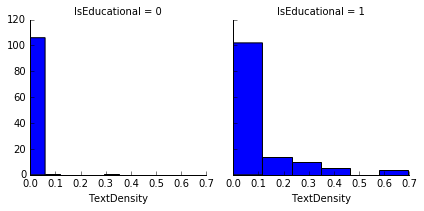

In [38]:
%matplotlib inline
g = sns.FacetGrid(data.to_dataframe(), col='IsEducational')
g.map(plt.hist, 'TextDensity', bins=6)
plt.show()

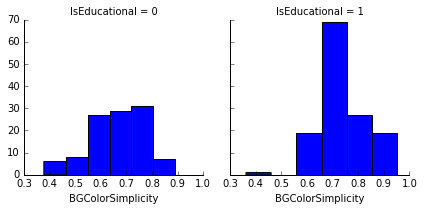

In [39]:
%matplotlib inline
g = sns.FacetGrid(data.to_dataframe(), col='IsEducational')
g.map(plt.hist, 'BGColorSimplicity', bins=6)
plt.show()

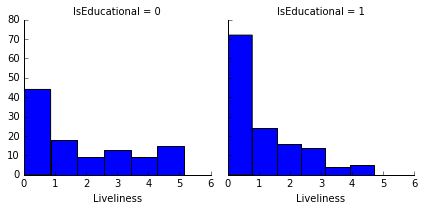

In [40]:
%matplotlib inline
g = sns.FacetGrid(data.to_dataframe(), col='IsEducational')
g.map(plt.hist, 'Liveliness', bins=6)
plt.show()

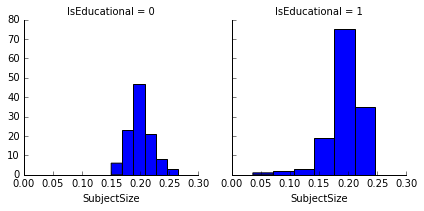

In [41]:
%matplotlib inline
g = sns.FacetGrid(data.to_dataframe(), col='IsEducational')
g.map(plt.hist, 'SubjectSize', bins=6)
plt.show()

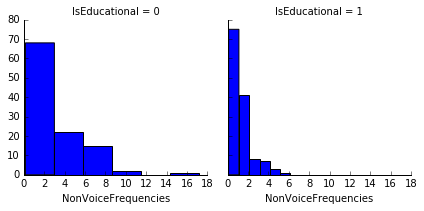

In [42]:
%matplotlib inline
g = sns.FacetGrid(data.to_dataframe(), col='IsEducational')
g.map(plt.hist, 'NonVoiceFrequencies', bins=6)
plt.show()

In [43]:
data["Liveliness_sq"] = data["Liveliness"].apply(lambda x: x * 2)

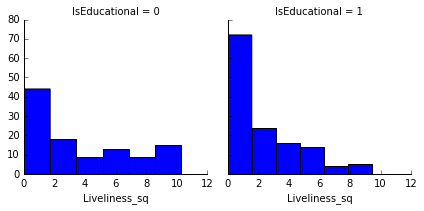

In [44]:
%matplotlib inline
g = sns.FacetGrid(data.to_dataframe(), col='IsEducational')
g.map(plt.hist, 'Liveliness_sq', bins=6)
plt.show()

In [45]:
training_set, test_set = data.random_split(.8, seed=None)

# New Feature
## Relevant tags count:
We collect a bunch of tags from the training set of those record marked as 'Educational'. The purpose is counting the matches of the tags of the videos in the test_set for tags that have at least a certain (THRESHOLD) similarity with those.
For example 'data' will match also with 'dati' and 'dato' or 'computer' will match 'compute'.

In [46]:
relTags = [y.lower() for x in training_set[training_set.apply(lambda k: k["IsEducational"] == 1)]["tags"] for y in x]
relTags[:10]

['ingegneria',
 'uninettuno',
 'nettuno',
 'basi',
 'di',
 'dati',
 'ingegneria',
 'uninettuno',
 'nettuno',
 'basi']

In [47]:
import difflib
import itertools

# min similarity ratio between strings
def sim(str_1, str_2):
    return difflib.SequenceMatcher(None, str_1, str_2).ratio()

In [48]:
THRESHOLD = 0.65

def isEducational(x):
    for tag in relTags:
        if(sim(x.lower(), tag) > THRESHOLD):
            return True
    return False

def countEducationalTags(l):
    counter = 0
    for tag in l:
        if(isEducational(tag)):
            counter = counter + 1
    return counter

data["EducationalTagsCount"] = data["tags"].apply(lambda lst: countEducationalTags(lst))
data["EducationalTagsCount"]

dtype: int
Rows: 243
[6L, 6L, 14L, 5L, 8L, 9L, 0L, 8L, 2L, 5L, 0L, 0L, 1L, 0L, 5L, 4L, 4L, 16L, 16L, 1L, 3L, 7L, 1L, 0L, 3L, 3L, 4L, 18L, 0L, 2L, 0L, 15L, 7L, 5L, 6L, 0L, 0L, 19L, 2L, 3L, 0L, 0L, 5L, 0L, 1L, 0L, 0L, 4L, 6L, 7L, 0L, 5L, 1L, 5L, 0L, 0L, 2L, 0L, 11L, 1L, 3L, 5L, 3L, 0L, 2L, 1L, 3L, 1L, 14L, 10L, 5L, 0L, 0L, 1L, 1L, 2L, 10L, 7L, 4L, 8L, 1L, 6L, 9L, 1L, 6L, 11L, 4L, 18L, 0L, 10L, 5L, 3L, 0L, 5L, 0L, 32L, 6L, 0L, 19L, 2L, ... ]

## Analysis:
As stated above this is a good indicator of whenever a video is educational or not. Despite some outlayers, the bin (0 -10) is full of educational videos

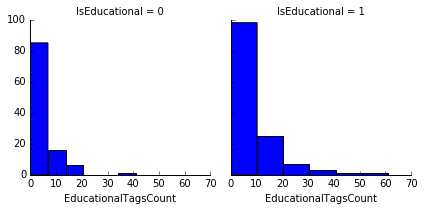

In [49]:
%matplotlib inline
g = sns.FacetGrid(data.to_dataframe(), col='IsEducational')
g.map(plt.hist, 'EducationalTagsCount', bins=6)
plt.show()

In [50]:
training_set, test_set = data.random_split(.8, seed=None)
features = ["lengthSeconds", "EducationalTagsCount", "TextDensity", "Liveliness_sq", "SubjectSize", "Brightness", "BGColorSimplicity", "NonVoiceFrequencies"]

classifier_boosted = gl.boosted_trees_classifier.create(training_set, target="IsEducational", features=features, validation_set=None)
classifier_decision_tree = gl.decision_tree_classifier.create(training_set, target="IsEducational", features=features, validation_set=None)
classifier_svm = gl.svm_classifier.create(training_set, target="IsEducational", features=features, validation_set=None, max_iterations=50)
classifier_logistic = gl.logistic_classifier.create(training_set, target="IsEducational", features=features, validation_set=None)

Boosted trees classifier:

--------------------------------------------------------

Number of examples          : 205

Number of classes           : 2

Number of feature columns   : 8

Number of unpacked features : 8

+-----------+--------------+-------------------+-------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss |

+-----------+--------------+-------------------+-------------------+

| 1         | 0.000000     | 0.970732          | 0.507973          |

| 2         | 0.000000     | 0.975610          | 0.384756          |

| 3         | 0.015624     | 0.985366          | 0.301927          |

| 4         | 0.015624     | 0.985366          | 0.243147          |

| 5         | 0.015624     | 0.995122          | 0.196345          |

| 6         | 0.015624     | 1.000000          | 0.166210          |

+-----------+--------------+-------------------+-------------------+

Decision tree classifier:

--------------------------------------------------------

Number of examples          : 205

Number of classes           : 2

Number of feature columns   : 8

Number of unpacked features : 8

+-----------+--------------+-------------------+-------------------+

| Iteration | Elapsed Time | Training-accuracy | Training-log_loss |

+-----------+--------------+-------------------+-------------------+

| 1         | 0.015606     | 0.970732          | 0.507973          |

+-----------+--------------+-------------------+-------------------+

SVM:

--------------------------------------------------------

Number of examples          : 205

Number of classes           : 2

Number of feature columns   : 8

Number of unpacked features : 8

Number of coefficients    : 9

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training-accuracy |

+-----------+----------+-----------+--------------+-------------------+

| 1         | 3        | 0.004878  | 0.000000     | 0.604878          |

| 2         | 5        | 1.000000  | 0.000000     | 0.775610          |

| 3         | 6        | 1.000000  | 0.000000     | 0.834146          |

| 4         | 7        | 1.000000  | 0.000000     | 0.809756          |

| 5         | 8        | 1.000000  | 0.000000     | 0.800000          |

| 6         | 9        | 1.000000  | 0.000000     | 0.824390          |

| 11        | 14       | 1.000000  | 0.000000     | 0.814634          |

+-----------+----------+-----------+--------------+-------------------+

TERMINATED: Iteration limit reached.

This model may not be optimal. To improve it, consider increasing `max_iterations`.

Logistic regression:

--------------------------------------------------------

Number of examples          : 205

Number of classes           : 2

Number of feature columns   : 8

In [51]:
def getAccuracy(model, data, target):
    predictions = model.predict(data)
    num_correct = sum(predictions == target)
    accuracy = num_correct * 1.0 / len(data)
    
    return accuracy

Number of unpacked features : 8

Number of coefficients    : 9

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

In [52]:
print("Boosted Trees: " + str(getAccuracy(classifier_boosted, test_set, test_set["IsEducational"])))
print("Decision Tree: " + str(getAccuracy(classifier_decision_tree, test_set, test_set["IsEducational"])))
print("SVM: " + str(getAccuracy(classifier_svm, test_set, test_set["IsEducational"])))
print("Logistic: " + str(getAccuracy(classifier_logistic, test_set, test_set["IsEducational"])))

| Iteration | Passes   | Elapsed Time | Training-accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 0.000000     | 0.843902          |

| 2         | 3        | 0.000000     | 0.858537          |

| 3         | 4        | 0.000000     | 0.853659          |

| 4         | 5        | 0.000000     | 0.853659          |

| 5         | 6        | 0.000000     | 0.848780          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

Boosted Trees: 0.868421052632
Decision Tree: 0.842105263158
SVM: 0.842105263158
Logistic: 0.842105263158
